In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

<b>1. Load the data :</b>

In [3]:
#1.1
housing_data = pd.read_excel('/home/labsuser/Datasets/housing.xlsx')

In [4]:
#1.2
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [13]:
#1.3
X = housing_data.drop(columns=['median_house_value'],axis=1)
Y = housing_data['median_house_value']

<b>2. Handle missing values :</b>

In [14]:
for i in X.columns:
    if(X[i].hasnans):
        print("Column", i, "-","has NANs",X[i].hasnans)
        X[i].fillna(value=X[i].mean(), inplace=True)
        print("NANs replaced with mean value in column", i)

Column total_bedrooms - has NANs True
NANs replaced with mean value in column total_bedrooms


In [15]:
if(Y.hasnans):
    Y.fillna(value=Y.mean(), inplace=True)

<b>3. Encode categorical data :</b>

In [16]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
X['ocean_proximity'].replace(to_replace=["NEAR BAY", "<1H OCEAN", "INLAND","NEAR OCEAN","ISLAND"], value=[1,2,3,4,5], inplace=True)

In [18]:
X['ocean_proximity'].unique()

array([1, 2, 3, 4, 5])

<b>4. Split the dataset :</b>

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


<b>5. Standardize data :</b>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaler.fit(x_train)
scaler.fit(x_test)
scaler.fit(pd.DataFrame(y_train))
scaler.fit(pd.DataFrame(y_test))
trans_x_train = scaler.transform(x_train)
trans_x_test = scaler.transform(x_test)
trans_y_train = scaler.transform(pd.DataFrame(y_train))
trans_y_test = scaler.transform(pd.DataFrame(y_test))

In [25]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [26]:
trns_train_df = pd.concat([pd.DataFrame(trans_x_train, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']), pd.DataFrame(trans_y_train, columns=['median_house_value'])], axis=1)
trns_train_df.shape

(16512, 10)

In [27]:
trns_test_df = pd.concat([pd.DataFrame(trans_x_test, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']), pd.DataFrame(trans_y_test, columns=['median_house_value'])], axis=1)
trns_test_df.shape

(4128, 10)

<b>6. Perform Linear Regression and find the RMSE using all the independent Variable provided:</b>

In [28]:
#6.1
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trans_x_train,trans_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#6.2
pred_val = model.predict(trans_x_test)
new_df = pd.concat([trns_test_df, pd.DataFrame(pred_val, columns=['Predicted_Value'])],axis=1)
new_df['err_pctg'] = abs(new_df['median_house_value'] - new_df['Predicted_Value'])/new_df['median_house_value']
new_df.shape

(4128, 12)

In [30]:
#6.3
from sklearn.metrics import mean_squared_error
mean_squared_error(new_df['median_house_value'], new_df['Predicted_Value'])

0.36475451570216494

<b>7. Perform Linear Regression using only Non Standardized independent variable Median_Income and plot the Actual vs Predicted values</b>

In [21]:
#7.1
X1= x_train['median_income']
Y1= y_train

X2= x_test['median_income']
Y2= y_test

In [22]:
#7.2
new_model=LinearRegression()
new_model.fit(pd.DataFrame(X1),Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#7.3
pred_val=new_model.predict(pd.DataFrame(X2))
new_df1 = pd.concat([X2.reset_index(),Y2.reset_index(),pd.DataFrame(pred_val, columns=['Pred_Value'])],axis=1)
new_df1.shape

NameError: name 'new_model' is not defined

In [24]:
new_df1['err_pctg'] = abs(new_df1['median_house_value'] - new_df1['Pred_Value'])/new_df1['median_house_value']
1-new_df1.err_pctg.mean()

0.6121674212041229

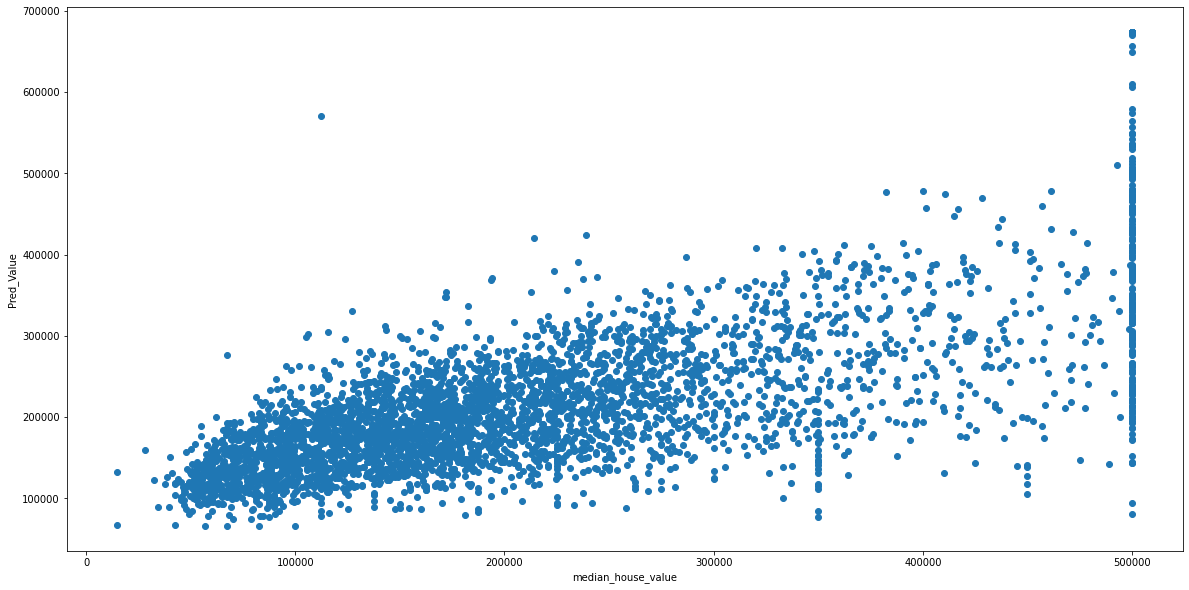

In [27]:
#7.4
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(new_df1['median_house_value'], new_df1['Pred_Value'])
plt.xlabel('median_house_value')
plt.ylabel('Pred_Value')
plt.show()